<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">Probabilidades</h1>

<h4 align="center">Concepto de integral definida y Métodos Monte-Carlo</h4>
<pre><div align="center"> La idea de este notebook es que sirva para iniciarse en conceptos
básicos del Probabilidades, Cálculo Integral y los métodos disponibles
para la generación de datos pseudo-aleatorios.</div>

## Probabilidades

## 6. Momentos de una distribución

En principio, dado un estudio en el cual haya información recolectada, podríamos no saber muy bien qué tipos de distribución siguen nuestros datos. Sin embargo, si tenemos una idea de cuál podría ser, es posible aproximar los parámetros de los que depende solo viendo el comportamiento gráfico de la distribución. Esto es posible gracias al algunos valores característicos de las distribuciones llamados **momentos**.

Los más utilizados son los llamados *primeros momentos*, donde aparecen la esperanza, varianza, asimetría y curtosis, entre otras.

### 6.1 Distribuciones discretas

Para una variable aleatoria discreta definida sobre un espacio muestral $\Omega$ con función densidad $f_X$, se define su **esperanza** (*expected value*) como

$$\mathbb{E}[X]=\sum_{k\in\Omega}k\cdot f_X(k)=\mu$$

Ésta se interpreta como el valor que se espera obtener la mayor cantidad de veces en un experimento realizado de forma sucesiva *ad infinitum*.

Se define la **varianza** (*variance*) como

$$\mathbb{E}[(X-\mu)^2]=\sum_{k\in\Omega}(k-\mu)^2\cdot f_X(k)=\mathbb{E}[X^2]-\mu^2=\sigma^2$$

y se interpreta como el grado de dispersión que se espera tener de los datos, es decir, qué tan "repartidos" están los resultados.

Se define la **asimetría** (*skewness*) como

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3\right]=\sum_{k\in\Omega} \left(\frac{k-\mu}{\sigma}\right)^3\cdot f_X(k)=\frac{\mathbb{E}\left[X^3\right]-3\mu\sigma^2-\mu^3}{\sigma^3}=\gamma$$

que puede interpretarse como el grado de distancia entre las regiones con mayor densidad respecto de un eje de simetría, o bien como qué tan "desbalanceada" está la función densidad.

Finalmente, la **curtosis** (*kurtosis*) como

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4\right]=\kappa$$

y mide la propensión de la distribución a generar datos muy poco frecuentes (*outliers*).

Si bien existe una fórmula cerrada para cada uno de estos momentos (y aquellos de orden superior), no es tan frecuente el uso de otros fuera de los listados, entre otras razones ya que las expresiones obtenidas no son muy compactas.

Como ejercicio, puede buscar la lista de distribuciones discretas vistas en la clase anterior y obtener una expresión para cada momento.


In [1]:
# Importando las librerías
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import experimento7 as ex

# En los siguientes bloques, se evaluará de forma explícita las pdf y CDF dadas, y también se
# aproximará mediante muestreos aleatorios para las distribuciones correspondientes

In [ ]:
# Cálculo exacto de esperanza
p = 0.75

N = 25
Omega = np.linspace(0, N, N+1)
mu = 0

for k in Omega:
    mu += k * ex.binomial(int(k), N, p)

# Cálculo exacto de varianza
var = 0

for k in Omega:
    var += (k - mu) ** 2 * ex.binomial(int(k), N, p)


In [ ]:
# Estimador insesgado para la esperanza sum(xn)/n

M = 10

tamano_muestras = np.linspace(1, M + 1, M + 1)

datos_aleatorios = np.random.uniform (1, 7, M)

proms = []

for i in range(M):
    avg = np.mean(datos_aleatorios[0 : i])
    proms.append(proms)

proms = np.asarray(proms)

# Estimador insesgado para la varianza sum((xn-mu)**2)/(n-1)




In [ ]:
plt.plot(tamano_muestras, proms, '.r')
plt.plot(tamano_muestras, mu * np.ones((M, 1)), '-b')
plt.show()

### 6.2 Distribuciones continuas

Similarmente al caso discreto, si se tiene una variable aleatoria continua $X$ definida en un espacio muestral $\Omega$, podemos definir sus momentos de forma análoga a lo anterior:

$$\mathbb{E}[X]=\int_{\Omega}x\cdot f_X(x)dx=\mu$$

$$\mathbb{E}[(X-\mu)^2]=\int_{\Omega}(x-\mu)^2\cdot f_X(x)dx=\sigma^2$$

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3\right]=\int_{\Omega} \left(\frac{x-\mu}{\sigma}\right)^3\cdot f_X(x)dx=\gamma$$

$$\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4\right]=\kappa$$

La interpretación en todos los casos es la misma, aunque siempre se debe tener la precaución de hacer la distinción entre la naturaleza discreta y la continua para evitar errores en la lectura de datos.

También se propone como ejercicio buscar los momentos de las distribuciones continuas vistas la clase anterior.


## 7. Teorema del Límite Central

Este teorema justifica algunos supuestos que se asumen en ciertos estudios de índole estadístico. A grandes rasgos, establece que un mismo experimento realizado múltiples veces de forma independiente (es decir, que un resultado no debe afectar o verse afectado por otro) tenderá a tener valores promedio cercanos a como se comporta una distribución normal. Por lo tanto, los valores intermedios, tendrán mayor peso estadístico que los valores extremos.

Matemáticamente se encuncia como que si se tiene una sucesión de variables aleatorias $\{X_n\}_n$ independientes e idénticamente distribuidas (iid), todas con esperanza $\mu$ y variaza $\sigma^2$, entonces

$$\displaystyle\lim_{n\rightarrow\infty}\mathbb{P}\left[\frac{(X_1-\mu)+(X_2-\mu)+\ldots+(X_n-\mu)}{\sqrt{n\sigma^2}}\le z\right]=\Phi(z)$$

donde $\Phi(z)=\displaystyle\frac{1}{\sqrt{2\pi}}\int_{-\infty}^ze^{-\frac{x^2}{2}}dx$ (distribución normal con media $0$ y varianza $1$).

In [ ]:
import matplotlib.animation as animation
%matplotlib notebook

In [ ]:
# muestras
n = 5000

# muestreo según alguna distribución
avg = []
for i in range(2, n):
    a = np.random.uniform(1, 7, i)
    avg.append(np.average(a))

In [ ]:
# graficar histograma
def clt(current):
    
    plt.cla()
    if current == n: 
        a.event_source.stop()

    plt.hist(avg[0:current], bins=50, edgecolor='k')

    plt.gca().set_title('Valor esperado')
    plt.gca().set_xlabel('Promedio de experimentos')
    plt.gca().set_ylabel('Frecuencia')

    plt.annotate('Experimento = {}'.format(current), [3,27])

In [ ]:
fig = plt.figure()
a = animation.FuncAnimation(fig, clt, interval=10)

## 8. Métodos Monte-Carlo

Los métodos Monte-Carlo son algoritmos de diversa índole, cuya heurística incorpora pasos en los que hay grados de incerteza, los que son aprovechados en cada programa para realizar cálculos sin necesidad de establecer relaciones muy complejas.

Ejemplos de su uso hay varios, aunque los más populares se encuentran en el análisis de sensibilidad de funciones (una forma indirecta de cálculo de derivada), en el cálculo de integrales numéricas (para conocer áreas, volúmenes, probabilidades) y en la exploración de dominios en general (llamados paseos aleatorios). En esta parte del curso, abordaremos las dos últimas, pues la parte de derivación ya fue vista con otros métodos. Sin embargo, eventualmente haremos referencia al análisis de sensibilidad de modelos.

### 8.1 Integración Numérica

Supongamos que deseamos conocer el que se encuentra limitada en un dibujo y que éste puede expresarse a través de funciones. Si hacemos "llover" puntos sobre este dibujo, una forma muy sencilla de aproximar el área es contar la cantidad de puntos que cayó dentro del dibujo, ignorando los que no. Esto nos da una fórmula bastante sencilla para la aproximación, suponiendo una cantidad robusta de puntos:

$$A_{\textrm{dibujo}}=A_{\textrm{cuadro}}\cdot\frac{|\textrm{Puntos dentro}|}{|\textrm{Puntos muestra}|}$$

Por lo general, para recoger la muestra de puntos, se suele limitar el contexto en que se encuentra el dibujo y se utiliza distribuciones apropiadas a la figura, aunque siempre es posible utilizar simplemente la distribución uniforme. La ventaja de usar otras distribuciones está en obtener convergencia al resultado real en menor cantidad de tiempo.

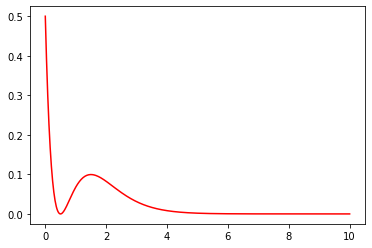

In [37]:
# Definir alguna función y graficarla con limites fijos
l = 2

x = np.linspace(0, 10, 500)
f = (x - 0.5) ** 2 * l * np.exp(-l * x)

plt.plot(x, f, '-r')
plt.show()

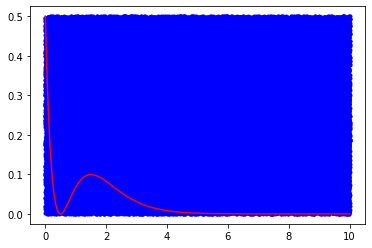

In [38]:
# Estimar área
tamano = 100000

a = 0
b = 10
c = 0
d = 0.5

A_cuadro = (b - a) * (d - c)

x_muestra = np.random.uniform(a, b, tamano)
y_muestra = np.random.uniform(c, d, tamano)

plt.plot(x_muestra, y_muestra, '.b')
plt.plot(x, f, '-r')
plt.show()

In [39]:
cuenta = 0

for i in range(tamano):
    if (a <= x_muestra[i] <= b) and (0 <= y_muestra[i] <= (x_muestra[i] - 0.5) ** 2 * l * np.exp(-l * x_muestra[i])):
        cuenta += 1

A_dibujo = A_cuadro * cuenta / tamano
print(A_dibujo)

0.2492


## Ejercicios

Utilice alguna forma de muestreo de Monte Carlo para resolver los siguientes problemas (puede convenir antes graficar los objetos mencionados, ya sea en computador o a mano):

**a)**  Encontrar el área bajo la curva de la función

entre $-\infty$ hasta cierto valor $t<\infty$ de su elección. Para ello, puede notar gráficamente que la función es prácticamente nula para valores $x<-10$. Note además que calcular esta integral equivale a calcular $\mathbb{P}[X\le t]$, cuando $X$ es una variable aleatoria normal de media $0$ y varianza $1$.

<br>

**b)** Encontrar la esperanza de una variable aleatoria $X$ que sigue una distribución $\chi^2(k)$ (chi-cuadrado de parámetro $k$), dada por la pdf

$$f(x) =  \left\{ \begin{matrix}
\frac{x^{\frac{k}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{k}{2}}\Gamma\left(\frac{k}{2}\right)} & , & x>0\\
0 & , & \sim\end{matrix} \right.$$

donde $\Gamma(x)$ es la función Gamma, que puede ser llamada desde Scipy con los comandos

``` Python
from scipy.special import gamma

gamma(x)  # x puede ser un arreglo

```

Note que $k$ es un número natural distinto de $0$ que permanece fijo y debe ser de su elección. Compare su resultado con el obtenido del artículo de <a href='https://en.wikipedia.org/wiki/Chi-square_distribution'>referencia</a>.

<br>

**c)** Encontrar el volumen encerrado bajo el cono de ecuación $x^2+y^2=z^2$, dentro el cilindro de ecuación $(x-1)^2+y^2=1$ y sobre el plano $z=0$. Intente generalizar el resultado anterior para un cilindro de ecuación $(x-a)^2+y^2=a^2$, con $0<a\le1$.